# Importing libraries

In [147]:
import pandas as pd
import numpy as np

# Understanding our dataset and cleaning unnecessary things

In [148]:
path = 'C:/Users/fatima/Documents/programs/Projetos/Skin_types/skin_products/skincare.csv'

In [149]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Title,Product,Category,Brand,Skin_Type,Number of items,Sold By,Price,Link
0,0,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,All,1,AIR SALES,372,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,1,"Nivea Soft Playful Peach, Light Moistu...",Moisturizer,SKINCARE,Nivea,All,1,RK World Infocom Pvt Ltd,226,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,Dry,1,MURALI RETAILS,103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,3,Biotique Morning Nectar Flawless Skin ...,Moisturizer,SKINCARE,Biotique,Combination,1,RK World Infocom Pvt Ltd,240,https://www.amazon.in/Biotique-Morning-Nectar-...
4,4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,SKINCARE,Minimalist,Dry,1,Minimalist Inc,284,https://www.amazon.in/Minimalist-Moisturizer-H...


# Adding more data with chatgpt

In [150]:
# Generate 300 more fake skincare products with different categories, titles, and values

import random 

# Assuming df is your original dataset, which we will extend with 300 new products

# Expanding the list of categories with additional product types
expanded_products = [
    ("Serum", ["Vitamin C Serum", "Retinol Anti-Aging Serum", "Hyaluronic Acid Serum", "Peptide Firming Serum"]),
    ("Cleanser", ["Foaming Cleanser", "Oil-Control Cleanser", "Gentle Hydrating Cleanser", "Exfoliating Scrub Cleanser"]),
    ("Sunscreen", ["SPF 30 Sunscreen", "Tinted Sunscreen", "Waterproof Sunscreen", "Sunscreen for Sensitive Skin"]),
    ("Eye Cream", ["Eye Repair Cream", "Soothing Eye Gel", "Under-Eye Brightening Cream", "Anti-Aging Eye Serum"]),
    ("Toner", ["Balancing Facial Toner", "Soothing Aloe Vera Toner", "Exfoliating Glycolic Acid Toner", "Vitamin C Toner"]),
    ("Face Mask", ["Clay Mask", "Hydrating Overnight Mask", "Charcoal Peel-Off Mask", "Anti-Aging Sheet Mask"]),
    ("Moisturizer", ["Lightweight Daily Moisturizer", "Oil-Free Hydrating Gel", "Rich Night Moisturizer", "SPF 15 Moisturizer"])
]

# Some random values for skin types, brands, and sellers
skin_types = ["All", "Dry", "Oily", "Combination", "Sensitive"]
brands = ["BrandA", "BrandB", "BrandC", "BrandD"]
sellers = ["Seller1", "Seller2", "Seller3", "Seller4"]
price_range = (100, 800)

# Generate 300 more fake entries
more_rows = []
num_new_products = 300

for _ in range(num_new_products):
    product_type, titles = random.choice(expanded_products)
    title = random.choice(titles)
    
    new_row = {
        "Unnamed: 0": len(df) + len(more_rows),  # Adjust to reflect continuation from original dataset
        "Title": title,
        "Product": product_type,
        "Category": "SKINCARE",
        "Brand": random.choice(brands),
        "Skin_Type": random.choice(skin_types),
        "Number of items": random.randint(1, 5),
        "Sold By": random.choice(sellers),
        "Price": random.randint(*price_range),
        "Link": "https://www.example.com/fake-product"
    }
    more_rows.append(new_row)

# Convert more rows to DataFrame
more_df = pd.DataFrame(more_rows)

# Append the additional data to the original dataset (df)
df = pd.concat([df, more_df], ignore_index=True)
df.head()



,Unnamed: 0,Title,Product,Category,Brand,Skin_Type,Number of items,Sold By,Price,Link
0,0,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,All,1,AIR SALES,372,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,1,"Nivea Soft Playful Peach, Light Moistu...",Moisturizer,SKINCARE,Nivea,All,1,RK World Infocom Pvt Ltd,226,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,Dry,1,MURALI RETAILS,103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,3,Biotique Morning Nectar Flawless Skin ...,Moisturizer,SKINCARE,Biotique,Combination,1,RK World Infocom Pvt Ltd,240,https://www.amazon.in/Biotique-Morning-Nectar-...
4,4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,SKINCARE,Minimalist,Dry,1,Minimalist Inc,284,https://www.amazon.in/Minimalist-Moisturizer-H...


In [151]:
# Checking the categories
df['Category'].unique()

# Since there's only one categorie, this collumn is unnecessary

array(['SKINCARE'], dtype=object)

In [152]:
# dropping unecessary columns
df = df.drop(['Unnamed: 0', 'Category', 'Number of items'], axis=1)


# PS: The number of items would be interesting if we could check at live if the product is in stock
#     since this isn't the case, the best action is to remove it.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      1738 non-null   object
 1   Product    1738 non-null   object
 2   Brand      1738 non-null   object
 3   Skin_Type  1738 non-null   object
 4   Sold By    1531 non-null   object
 5   Price      1738 non-null   int64 
 6   Link       1738 non-null   object
dtypes: int64(1), object(6)
memory usage: 95.2+ KB


In [154]:
# Checking for null/na values
print(f'Null values: {df.isnull().sum()}')
print('---------------------------------')
print(f'\n\n\nNA values: {df.isna().sum()}')

Null values: Title          0
Product        0
Brand          0
Skin_Type      0
Sold By      207
Price          0
Link           0
dtype: int64
---------------------------------



NA values: Title          0
Product        0
Brand          0
Skin_Type      0
Sold By      207
Price          0
Link           0
dtype: int64


In [155]:
# Sold By has lots of missing values and for our case it's not an essential information
df = df.drop('Sold By', axis=1)

In [156]:
print(f'QTD unique values in skins type: {df["Skin_Type"].nunique()}')
print('----------------------------------')
print(f'Unique values: {df["Skin_Type"].unique()}')

QTD unique values in skins type: 57
----------------------------------
Unique values: ['All' 'Dry' 'Combination' 'All, Combination, Sensitive, Dry, Normal'
 'Normal' 'Sensitive, Dry' 'Oily, Acne Prone' 'Dry, Normal' 'Acne' 'Oily'
 'Oily, Acne Prone, Sensitive' 'All, Acne' 'Dry, Normal Skin' 'All, Dry'
 'Sensitive' 'Oily, Combination, Dry, Normal' 'Normal to Dry skin'
 'All, Oily, Combination, Sensitive, Normal' 'Oily, Combination'
 'All, Oily, Combination, Dry, Normal' 'All, Sensitive' 'Dry;Combination'
 'All, especially extra-dry skin' 'Normal to Oily Skin' 'Acne, Dry'
 'All, Combination, Normal' 'All, Oily, Combination, Sensitive, Dry'
 'Oily, Combination, Sensitive'
 'All, Oily, Combination, Acne Prone, Dry, Normal' 'All Skin Types,Oily'
 'All Skin Type' 'Acne Prone' 'Acne Prone,Oily,Dry,All Skin Types'
 'All, Oily, Sensitive, Dry, Normal'
 'All Skin, Oily, Combination, Sensitive, Dry, Normal'
 'Dry,All Skin Types' 'Acne Prone,All Skin Types'
 'Oily, Combination, Sensitive, Dry, Nor

In [157]:
# Transforming the information in our column in lists os values
df['Skin_Type'] = df['Skin_Type'].apply(lambda x: x.split(', '))

In [158]:
# Looking for all the unique products
df['Product'].unique()

array(['Moisturizer', 'Primer', 'Facial sprays', 'Hand cream',
       'Nail paint', 'Serum', 'Sunscreen', 'Cleanser', 'Face Mask',
       'Toner', 'Eye Cream'], dtype=object)

In [159]:
# Checking the nail paints 
# filter_products = df.loc[df['Product'] == 'Nail paint']
# print(filter_products)

# Cleaning the products that are not necessary for this project
df = df[df['Product'] != 'Nail paint']
df = df[df['Product'] != 'Hand cream']
df

,Title,Product,Brand,Skin_Type,Price,Link
0,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,Nivea,[All],372,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,"Nivea Soft Playful Peach, Light Moistu...",Moisturizer,Nivea,[All],226,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,Nivea,[Dry],103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Biotique Morning Nectar Flawless Skin ...,Moisturizer,Biotique,[Combination],240,https://www.amazon.in/Biotique-Morning-Nectar-...
4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,Minimalist,[Dry],284,https://www.amazon.in/Minimalist-Moisturizer-H...
...,...,...,...,...,...,...
1733,Clay Mask,Face Mask,BrandC,[Oily],572,https://www.example.com/fake-product
1734,Exfoliating Scrub Cleanser,Cleanser,BrandA,[Combination],171,https://www.example.com/fake-product
1735,Eye Repair Cream,Eye Cream,BrandD,[Oily],377,https://www.example.com/fake-product
1736,Under-Eye Brightening Cream,Eye Cream,BrandC,[Oily],451,https://www.example.com/fake-product


# Visualizations

###  Lybraries

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

### Graphics

* Graphic 1:

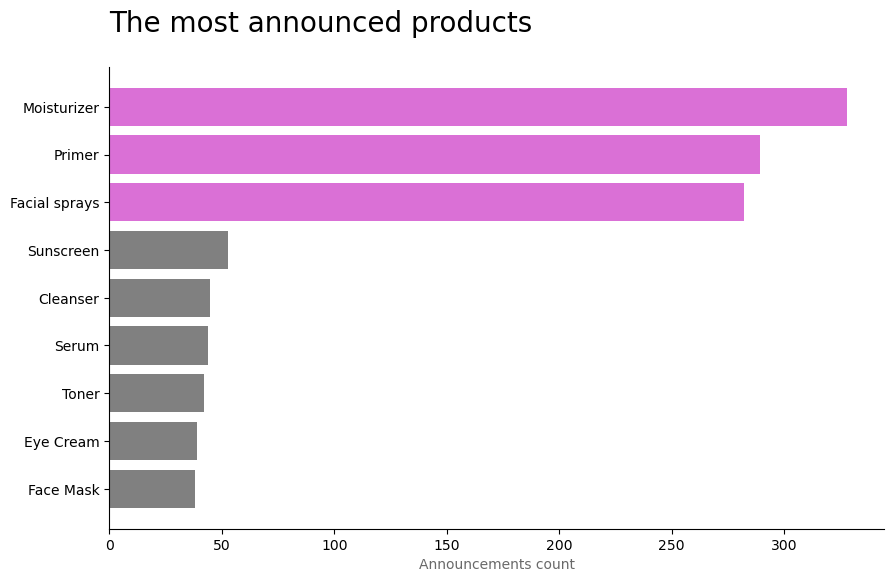

In [161]:
# Function to count the frequency of products
def count_products(df, products):
    counts = {}
    for product in products:
        counts[product] = (df['Product'] == product).sum()
    return counts

# Separating parameters for our dataset
products = list(df['Product'].unique())
values_prod = count_products(df, products)

df_products = pd.DataFrame(list(values_prod.items()), columns=['Product', 'Frequency'])
df_products = df_products.sort_values(by='Frequency', ascending=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_products['Product'], df_products['Frequency'], 
        color = ['gray', 'gray', 'gray', 
                 'gray', 'gray','gray', 
                 'orchid', 'orchid', 
                 'orchid'])

# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Titles
ax.set_title('The most announced products', fontweight='roman', fontsize=20, loc='left', x=0, y=1.058 )
#plt.suptitle('Moisturizer, Primer and Facial Sprays', x=0.32 ,y=0.92)
ax.set_xlabel('Announcements count', color='dimgray')
ax.set_ylabel('')

plt.show()


* Graphic 2:

In [162]:
# This function calculates the frequency tha each brand appears in our DF - Different products on Sale
def count_brand(df, brand):
    c=0
    for i in df:
        if i == brand:
            c +=1
    return c

# I chose to heighlight brands that can be easily found in Brasil
nivea       = count_brand(df['Brand'], 'Nivea')
cetaphil    = count_brand(df['Brand'], 'Cetaphil')
neutrogena  = count_brand(df['Brand'], 'Neutrogena')
bioderma    = count_brand(df['Brand'], 'Bioderma')
loreal      = count_brand(df['Brand'], "L'Oreal Paris")
cerave      = count_brand(df['Brand'], 'CeraVe')
la_roche    = count_brand(df['Brand'], 'La Roche-Posay')
garnier     = count_brand(df['Brand'], 'Garnier')
dove        = count_brand(df['Brand'], 'Dove')
maybelline  = count_brand(df['Brand'], 'Maybelline')

# Saving results in a list with the same order
values = [nivea, cetaphil, neutrogena, bioderma, loreal, cerave, la_roche, garnier, dove, maybelline]
brand = ['Nivea', 'Cetaphil', 'Neutrogena', 'Bioderma', "L'Oreal Paris", 
         'CeraVe', 'La Roche-Posay', 'Garnier', 'Dove', 'Maybelline']

data = { 'Brand' : brand, 'Values': values}

# Sorting our values in decrecent order
data = (pd.DataFrame(data)).sort_values(by='Values', ascending=True)


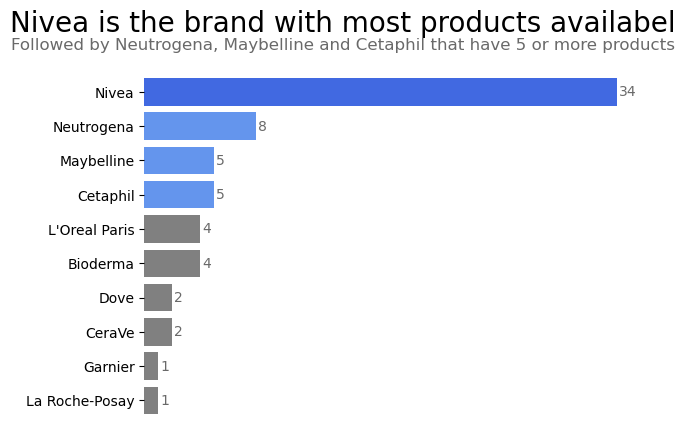

In [163]:
# Visualizing informations
fig, ax = plt.subplots()
bars = ax.barh(data['Brand'], data['Values'],
        color = ['gray', 'gray', 'gray', 
                 'gray', 'gray','gray', 
                 'cornflowerblue', 'cornflowerblue', 
                 'cornflowerblue', 'royalblue'])

# Titles
plt.title('Nivea is the brand with most products availabel', fontweight= 'roman', fontsize=20, x=0.4, y=1.058)
plt.suptitle('Followed by Neutrogena, Maybelline and Cetaphil that have 5 or more products', 
             fontweight='light', x=0.435 ,y=0.93, color='dimgray')

#plt.xlabel('Different products availabel', loc='right')

# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])

# Adding values to the bars
ax.bar_label(bars, padding=1.5, color='dimgray')

plt.show()

* Graph 3

In [164]:
# This function calculates the avg price for each brand
def mean_price_b(df, b):
    product_prices = df[df['Brand'] == b]['Price']
    
    if len(product_prices) == 0:
        return f"Brand {b} not found."

    return product_prices.mean()

# I chose to heighlight brands that can be easily found in Brasil
nivea       = mean_price_b(df, 'Nivea')
cetaphil    = mean_price_b(df, 'Cetaphil')
neutrogena  = mean_price_b(df, 'Neutrogena')
bioderma    = mean_price_b(df, 'Bioderma')
loreal      = mean_price_b(df, "L'Oreal Paris")
cerave      = mean_price_b(df, 'CeraVe')
la_roche    = mean_price_b(df, 'La Roche-Posay')
garnier     = mean_price_b(df, 'Garnier')
dove        = mean_price_b(df, 'Dove')
maybelline  = mean_price_b(df, 'Maybelline')

# Saving parameter
mean_b = [nivea, cetaphil, neutrogena, bioderma, loreal, cerave, la_roche, garnier, dove, maybelline]

mean_b = { 'Brand' : brand, 'Mean': mean_b}

# Sorting our values in decrecent order
mean_b = (pd.DataFrame(mean_b)).sort_values(by='Mean', ascending=False)


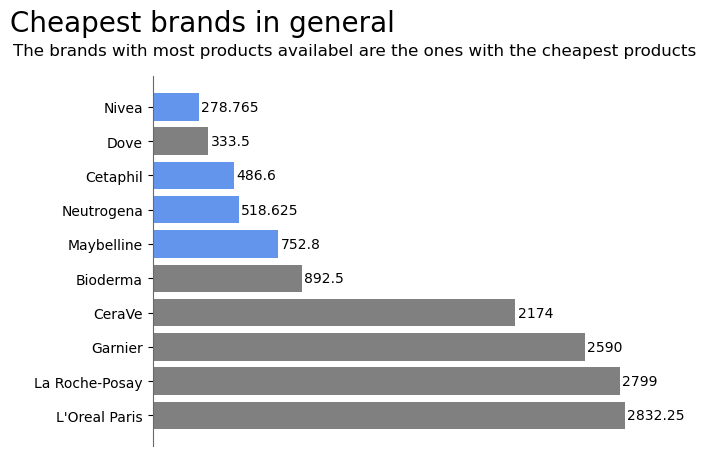

In [165]:
fig, ax = plt.subplots()
bars = ax.barh(mean_b['Brand'], mean_b['Mean'],
       color = [ 'gray', 'gray','gray', 
                'gray', 'gray', 'cornflowerblue',
                'cornflowerblue','cornflowerblue', 'gray', 
                'cornflowerblue'])


# Titles
plt.title('Cheapest brands in general', fontweight= 'roman', fontsize=20, x=0.1, y=1.1)
plt.suptitle('The brands with most products availabel are the ones with the cheapest products', 
             x=0.44, y=0.95, fontweight='ultralight')



# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

# Setting colors
ax.spines['bottom'].set_color('dimgray')
ax.spines['left'].set_color('dimgray')
ax.tick_params(axis='x', colors='dimgray')

# Adding values to the bars
ax.bar_label(bars, padding=1.5)


plt.show()

* Graph 4

In [166]:
# This function calculates the avg price for each product
def mean_price(df, p):
    product_prices = df[df['Product'] == p]['Price']
    
    if len(product_prices) == 0:
        return f"Product {p} not found."

    return product_prices.mean()

# Calling function
means = []
for i in products:
        means.append(mean_price(df, i))


# Saving parameter
mean_p = { 'Product' : products, 'Mean': means}

# Sorting our values in decrecent order
mean_p = (pd.DataFrame(mean_p)).sort_values(by='Mean', ascending=False)


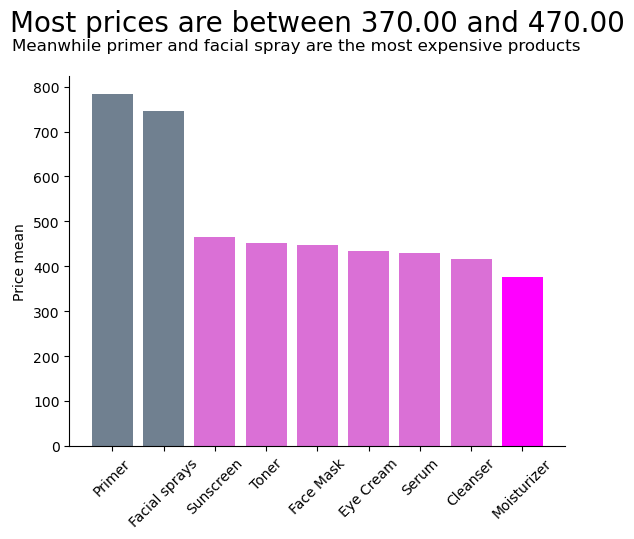

In [167]:
fig, ax = plt.subplots()
ax.bar(mean_p['Product'], mean_p['Mean'],
       color = ['slategray', 'slategray', 'orchid',
                'orchid', 'orchid', 'orchid',
                'orchid', 'orchid', 'magenta'])


# Titles
plt.title('Most prices are between 370.00 and 470.00', fontweight= 'roman', fontsize=20, x=0.5, y=1.1)
plt.suptitle('Meanwhile primer and facial spray are the most expensive products', fontweight='ultralight', x=0.48, y=0.96)
plt.ylabel('Price mean')


# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)

plt.show()


In [260]:
import plotly.express as px
#from plotly import graph_objects as go

fig = px.funnel(mean_p,  mean_p['Mean'], mean_p['Product'],
                title='Moisturizer is the cheapest generic product')

fig.show()

* Graph 5 

In [169]:
mean_p

,Product,Mean
1,Primer,783.238754
2,Facial sprays,745.684397
4,Sunscreen,464.339623
7,Toner,452.785714
6,Face Mask,447.947368
8,Eye Cream,434.769231
3,Serum,430.727273
5,Cleanser,417.288889
0,Moisturizer,376.158537


In [170]:
# This function gets all the prices
def get_prices(df, p):
    product_prices = df[df['Product'] == p]['Price']
    
    if len(product_prices) == 0:
        return f"Product {p} not found."

    return list(product_prices)

# Calling function
primer_box      = get_prices(df, 'Primer')
fs_box          = get_prices(df, 'Facial sprays')
cleanser_box    = get_prices(df, 'Cleanser')
sun_box         = get_prices(df, 'Sunscreen')
toner_box       = get_prices(df, 'Toner')
mask_box        = get_prices(df, 'Face Mask')
eye_box         = get_prices(df, 'Eye Cream')
serum_box       = get_prices(df, 'Serum')
moisturizer_box = get_prices(df, 'Moisturizer')

# Extending shorter arrays so they will have the same length
max_length = max(len(primer_box), len(fs_box), len(cleanser_box),
                 len( sun_box), len( toner_box), len(mask_box),
                 len(eye_box), len(serum_box), len(moisturizer_box))

primer_box += [np.nan] * (max_length - len(primer_box))
fs_box += [np.nan] * (max_length - len(fs_box))
cleanser_box += [np.nan] * (max_length - len(cleanser_box))
sun_box += [np.nan] * (max_length - len(sun_box))
toner_box += [np.nan] * (max_length - len(toner_box))
mask_box += [np.nan] * (max_length - len(mask_box))
eye_box += [np.nan] * (max_length - len(eye_box))
serum_box += [np.nan] * (max_length - len(serum_box))
moisturizer_box += [np.nan] * (max_length - len(moisturizer_box))


# Creating dataset
products_all_prices = pd.DataFrame({'Primer' : primer_box, 'Face Spray' : fs_box,
                       'Cleanser' : cleanser_box, 'Sunscreen' : sun_box,
                       'Toner': toner_box, 'Face Mask' : mask_box,
                       'Eye Cream' : eye_box, 'Serum' : serum_box,
                       'Moisturizer' : moisturizer_box})

In [173]:
# Function to add values on the boxplot
def add_boxplot_values(bp, ax):
    # Annotate the median
    for median in bp['medians']:
        x, y = median.get_xydata()[1]  # Get the median coordinates
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontweight='bold')  # Annotate the median
    
    # Annotate the quartiles (25th and 75th percentiles)
    for box in bp['boxes']:
        # Get the lower and upper quartile from the vertices
        lower_whisker, upper_whisker = box.get_path().vertices[0], box.get_path().vertices[2]
        
        # Annotate the lower quartile (25th percentile)
        ax.text(lower_whisker[0], lower_whisker[1], f'{lower_whisker[1]:.2f}', 
                ha='center', va='top')
        
        # Annotate the upper quartile (75th percentile)
        ax.text(upper_whisker[0], upper_whisker[1], f'{upper_whisker[1]:.2f}', 
                ha='center', va='bottom')

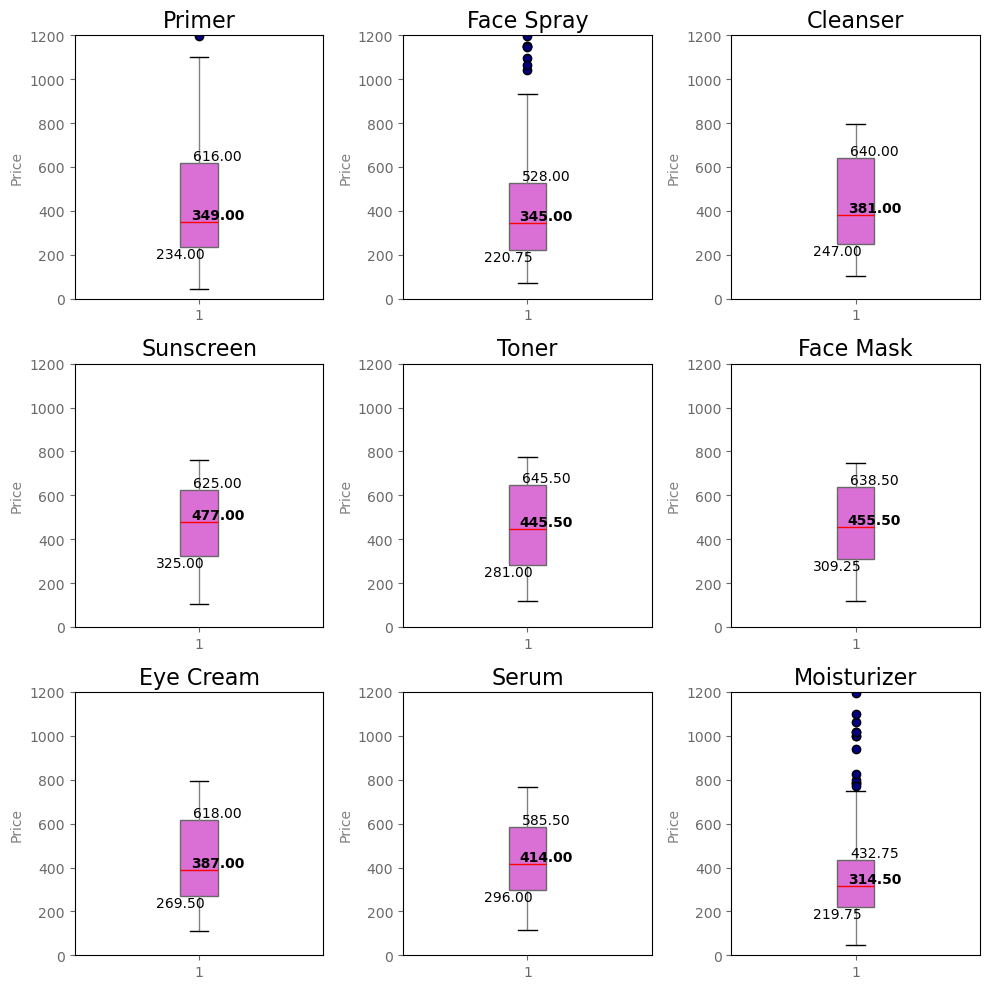

In [254]:
# Formating and flattening
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Plotting all the products
for i, product in enumerate(products_all_prices.columns):
    # Get the boxplot object
    bp = axes[i].boxplot(products_all_prices[product].dropna(), patch_artist=True)

    # Changing y and x for better visualization
    axes[i].set_title(f'{product}', fontweight= 'roman', fontsize=16)
    axes[i].set_ylabel('Price', color='gray')
    axes[i].tick_params(axis='x', colors='dimgray')
    axes[i].tick_params(axis='y', colors='dimgray')
    axes[i].set_ylim(0, 1200)
    
    # Customize all boxes with the color "orchid"
    for box in bp['boxes']:
        box.set(facecolor='orchid', edgecolor='dimgray')  # Set box color to "orchid" and edges to black
    for whisker in bp['whiskers']:
        whisker.set(color='gray')                   # Whisker color
    for cap in bp['caps']:
        cap.set(color='black')                       # Cap color
    for median in bp['medians']:
        median.set(color='red')                        # Median line color
    for flier in bp['fliers']:
        flier.set(markerfacecolor='navy', marker='o')  # Outlier (flier) color
    
    # Call function to add the values on the boxplot
    add_boxplot_values(bp, axes[i])

# Remove extra subplots if the number of products is less than 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We have tons of outliers on Primer, Face Sprays and Moisturizer

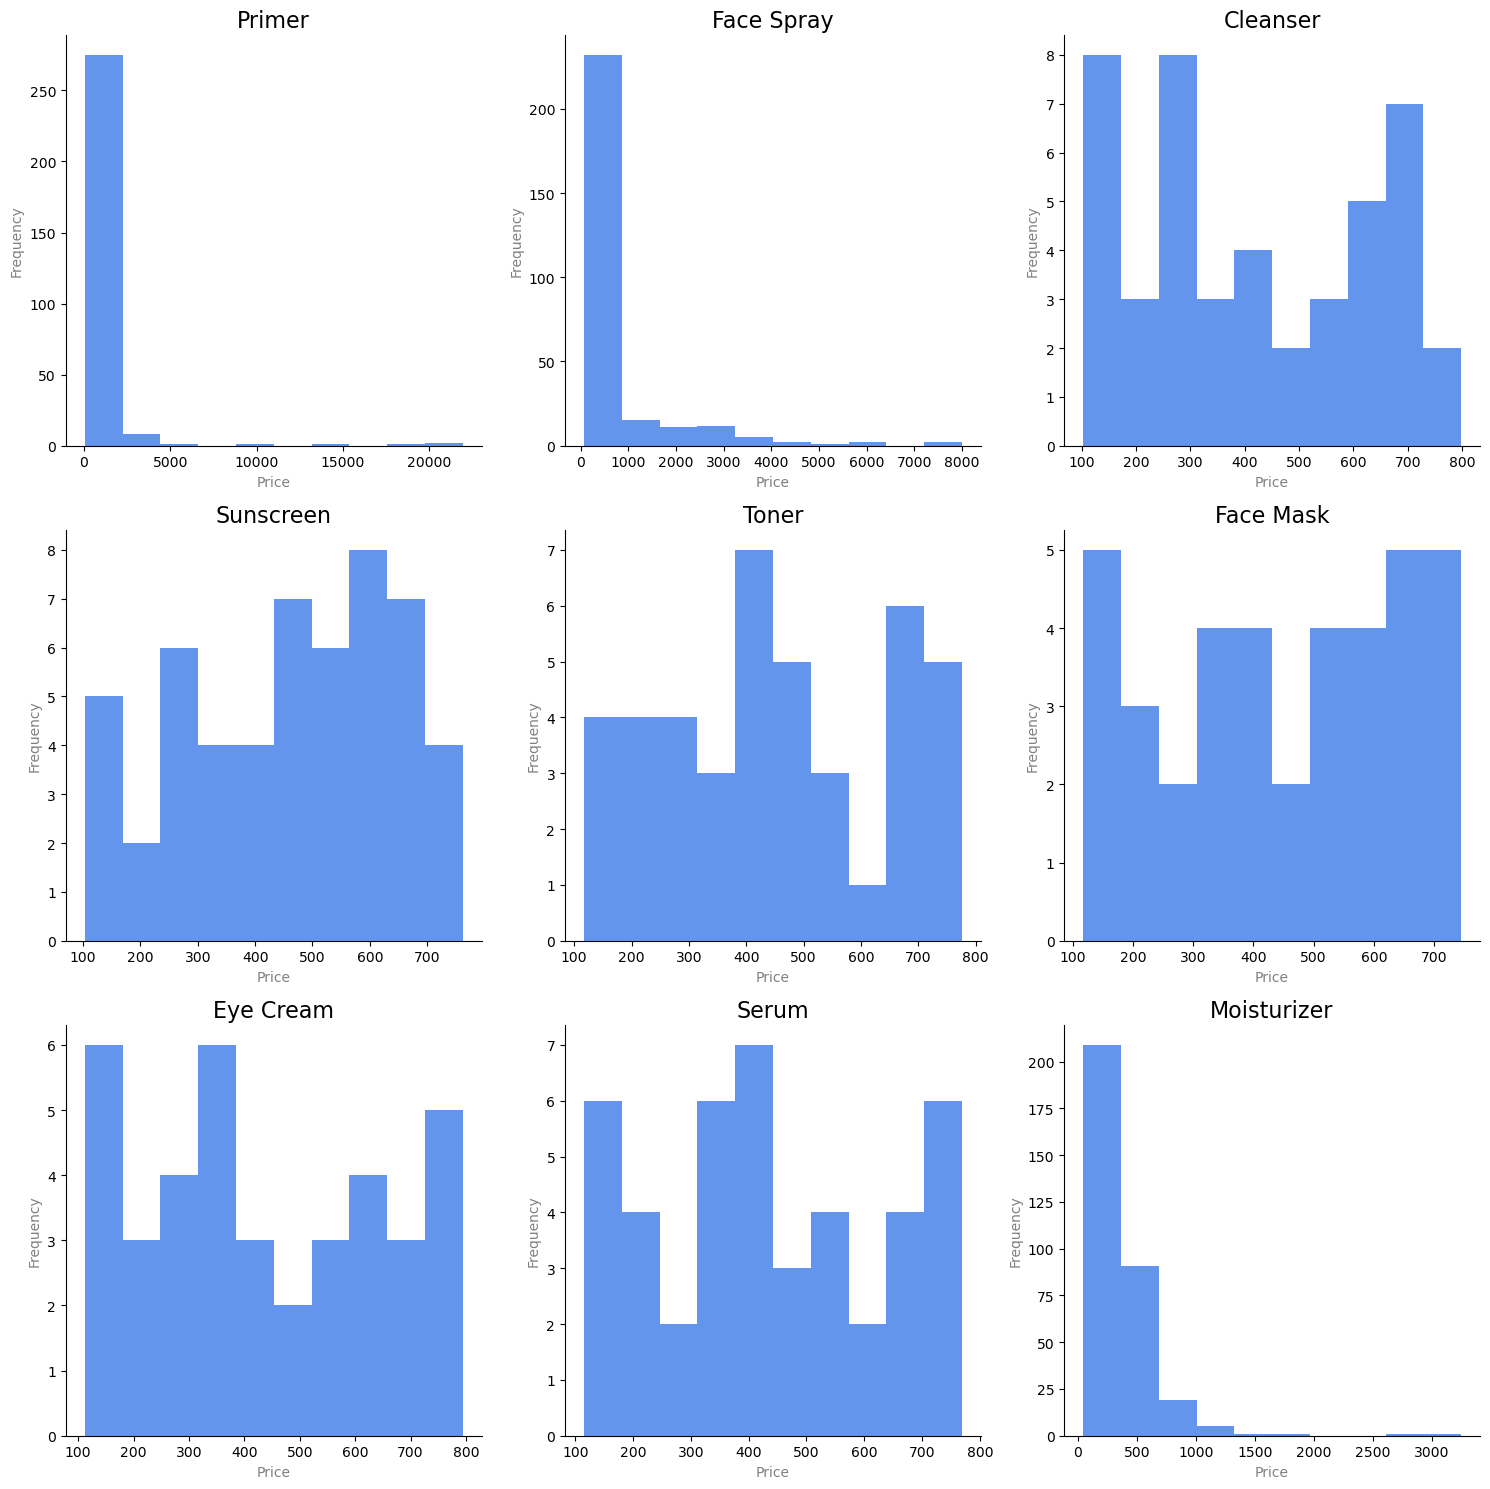

In [225]:
# Formating and flattening
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plotting all the products
for i, product in enumerate(products_all_prices.columns):
    axes[i].hist(products_all_prices[product].dropna(), color='cornflowerblue')
    
    axes[i].set_title(f'{product}', fontweight= 'roman', fontsize=16)
    axes[i].set_xlabel('Price', color='gray')
    axes[i].set_ylabel('Frequency', color='gray')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)


# Remove extra subplots if the number of products is less than 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

As we can see, its not possible to visualize those graphics with the same dimensions so we must study them separately

In [226]:
# Creating separated datasets
prices_smalls = pd.DataFrame({'Cleanser' : cleanser_box, 'Sunscreen' : sun_box,
                              'Toner': toner_box, 'Face Mask' : mask_box,
                              'Eye Cream' : eye_box, 'Serum' : serum_box,})

prices_bigs = pd.DataFrame({'Primer' : primer_box, 'Face Spray' : fs_box,
                            'Moisturizer' : moisturizer_box})

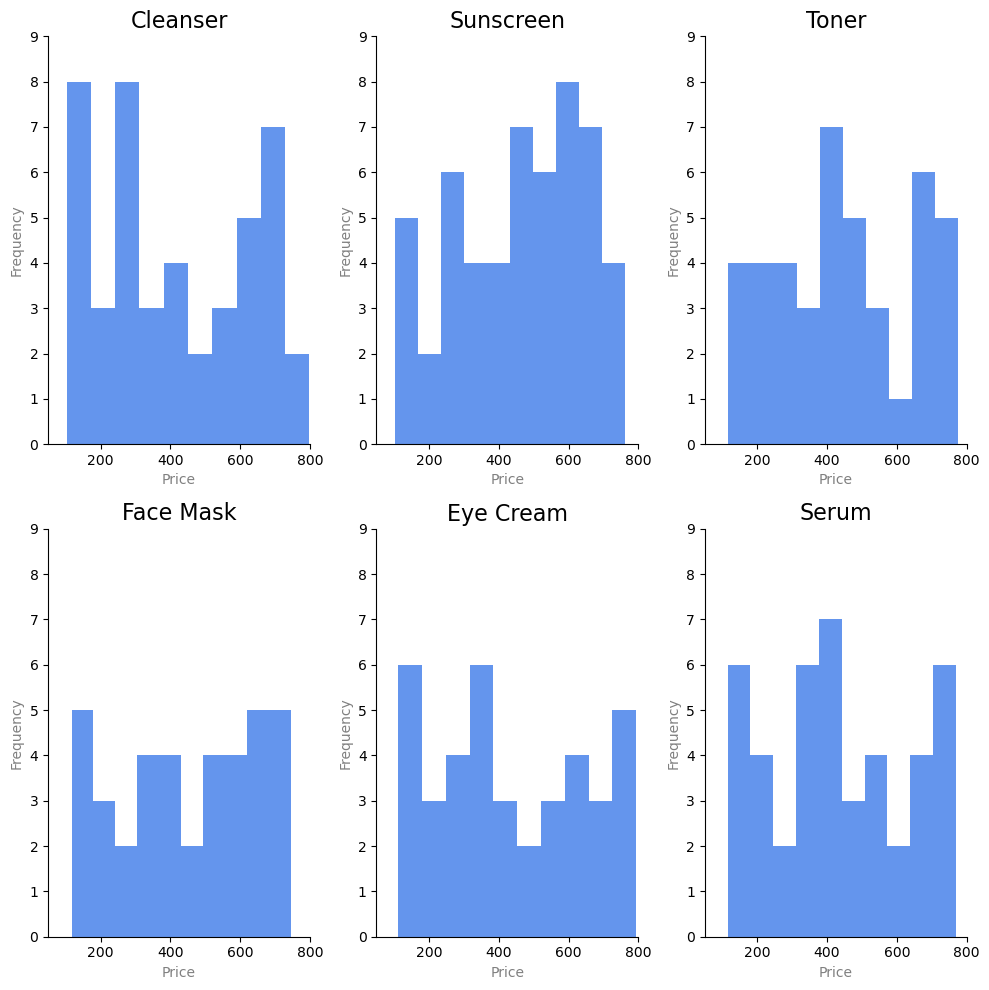

In [233]:
# Formating and flattening
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

# Plotting all the products
for i, product in enumerate(prices_smalls.columns):
    axes[i].hist(prices_smalls[product].dropna(), color='cornflowerblue')
    
    axes[i].set_title(f'{product}', fontweight= 'roman', fontsize=16)
    axes[i].set_xlabel('Price', color='gray')
    axes[i].set_ylabel('Frequency', color='gray')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    # Set the same y-axis and x-axis limits
    axes[i].set_ylim(0, 9)
    axes[i].set_xlim(50,800)


# Remove extra subplots if the number of products is less than 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

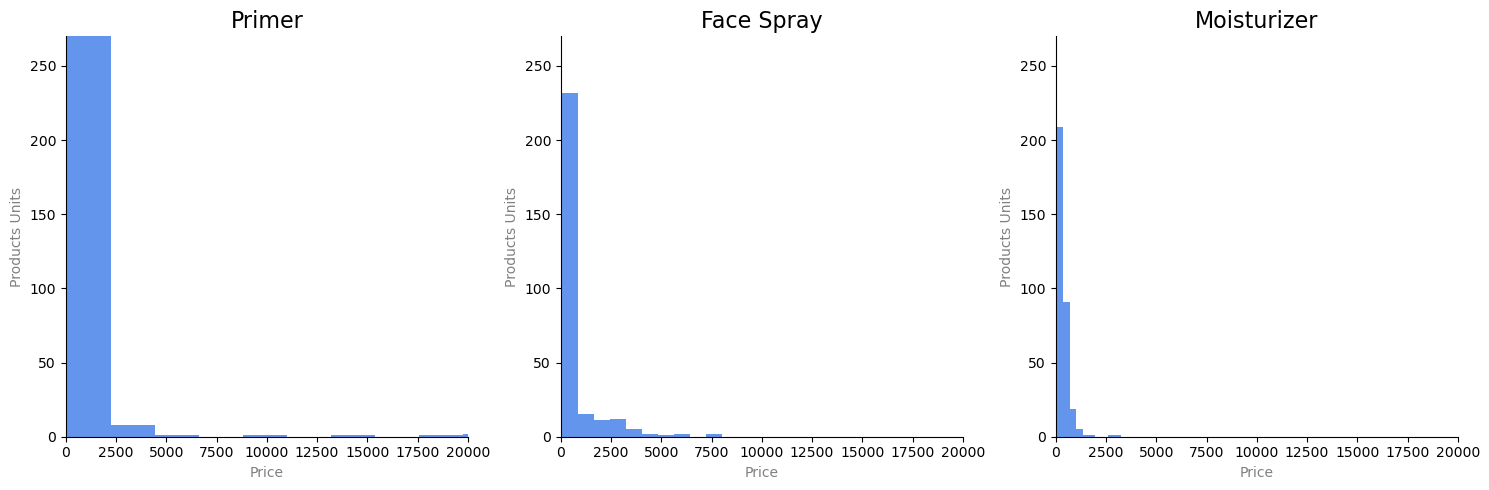

In [242]:
# Formating and flattening
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Plotting all the products
for i, product in enumerate(prices_bigs.columns):
    axes[i].hist(prices_bigs[product].dropna(), color='cornflowerblue')
    
    axes[i].set_title(f'{product}', fontweight= 'roman', fontsize=16)
    axes[i].set_xlabel('Price', color='gray')
    axes[i].set_ylabel('Products Units', color='gray')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    # Set the same y-axis and x-axis limits
    axes[i].set_ylim(0, 270)
    axes[i].set_xlim(0,20000)

# Remove extra subplots if the number of products is less than 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [244]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=prices_bigs.columns)

# Plotting all the products
for i, product in enumerate(prices_bigs.columns):
    fig.add_trace(
        go.Histogram(
            x=prices_bigs[product].dropna(),
            marker=dict(color='cornflowerblue'),
            name=product
        ),
        row=1, col=i+1
    )
    
    # Set axis properties for each subplot
    fig.update_xaxes(title_text='Price', row=1, col=i+1, color='gray')
    fig.update_yaxes(title_text='Products Units', row=1, col=i+1, color='gray')

# Set layout
fig.update_layout(
    height=600, width=1000,
    showlegend=False,
    title_text="Products Price Distribution",
    title_x=0.5,
    template='simple_white'
)

# Set the same y-axis and x-axis limits across all subplots
fig.update_yaxes(range=[0, 270])
fig.update_xaxes(range=[0, 20000])

# Show the interactive plot
fig.show()

# Apllying filters to get the best product for our client

In [52]:
# This function gets the client skintype
def get_skin():
    ...

skin = get_skin()


# This function finds the products for the clients skin
def finds_product(client_skin, df):
    return df[df['Skin_Type'].apply(lambda x: client_skin in x)]

result = finds_product(skin, df)

In [53]:
result

,Title,Product,Brand,Skin_Type,Price,Link


In [54]:
# Importing libraries to create a report with all the products 
# for the clients skin type
from tabulate import tabulate
from fpdf import FPDF